In [1]:
import numpy as np
import pfnet as pf
from scipy.sparse import triu,bmat,coo_matrix,eye,spdiags
import matplotlib.pyplot as plt
from scikits.sparse.cholmod import cholesky
import time

%matplotlib inline

In [2]:
from cvxpy import *
import mosek
import gurobi

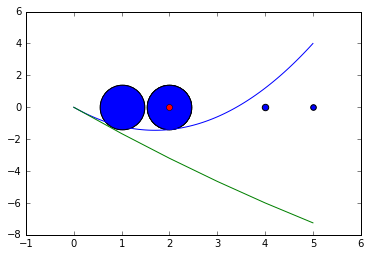

In [40]:
# PWL approximation
PWL=True
pwl_cost=[]

p_min=0
p_max=5
quad_cost=0.5
lin_cost=-1.7
pwl_points=100
pwl_cost=np.zeros([1,pwl_points])
for gen_id in range(1):
    xx=np.linspace(p_min,p_max,pwl_points+1)
    y=np.zeros(pwl_points+1)
    for i in range(0,pwl_points+1):
        y[i]=quad_cost*xx[i]**2 + lin_cost*xx[i]
        pwl_cost[gen_id][i-1]=((y[i]-y[i-1])/(xx[i]-xx[i-1]))
    plt.plot(xx,y)

pwl_points=5
pwl_cost=np.zeros([1,pwl_points])
noise=0.1
for gen_id in range(1):
    xx=np.linspace(p_min,p_max,pwl_points+1)
    y=np.zeros(pwl_points+1)
    for i in range(0,pwl_points+1):
        y[i]=(quad_cost*noise)*xx[i]**2 + lin_cost*xx[i] + -0*xx[i]
        pwl_cost[gen_id][i-1]=((y[i]-y[i-1])/(xx[i]-xx[i-1]))
    plt.plot(xx,y)

def plot_update(slope_update):
    xx=np.linspace(p_min,p_max,pwl_points+1)
    y=np.zeros(pwl_points+1)
    for i in range(0,pwl_points+1):
        y[i]=(quad_cost*noise)*xx[i]**2 + lin_cost*xx[i] + slope_update*xx[i]
        pwl_cost[gen_id][i-1]=((y[i]-y[i-1])/(xx[i]-xx[i-1]))
#     plt.plot(xx,y)
            


p=Int()
Objetive= quad_form(p,quad_cost)+lin_cost*p
prob=Problem(Minimize(Objetive),[p<=p_max])
Q=prob.solve(solver=GUROBI)
plt.plot(p.value,0,'ro')

slope_update=0
# slope_update.value=0
# p=Variable()
for k in range(200):
    gk=Variable(pwl_points)
    Objetive_pwl=0
    for j in range(pwl_points):
        Objetive_pwl=Objetive_pwl + gk[j]*pwl_cost[0][j]
    Constraints_pwl=[]
    Constraints_pwl.append(p<=p_max)
    # Constraints_pwl.append(p>=p_min)
    for j in range (pwl_points):
        Constraints_pwl.append(gk[j:(j+1)]<=1.*(p_max-p_min)/(pwl_points))
        Constraints_pwl.append(gk[j:(j+1)]>=0)
    Constraints_pwl.append( p== np.sum ([gk[j:(j+1)] for j in range(pwl_points)]) )
    prob_pwl=Problem(Minimize(Objetive_pwl),Constraints_pwl)
    Q_pwl=prob_pwl.solve(solver=GUROBI)
    plt.scatter(p.value,0,s=k*10+1)
#     plt.plot(p.value,np.asarray(pwl_cost[0]*gk.value)[0][0],'ko')
    alpha=1./(k+1+10)
    slope_update=slope_update+alpha*(quad_cost*p.value*2+lin_cost - pwl_cost[0][int(p.value*pwl_points/p_max)-1] )
#     print int(p.value),pwl_cost[0]
#     print slope_update
    plot_update(slope_update=slope_update)
#     print pwl_cost

# mult=1
# plt.plot([xx[1],xx[2]*mult],[y[1],y[2]*mult],'k') pwl_cost[0][int(p.value)]
# plt.ylim([-5,5])
plt.show()

In [339]:
Constraints_pwl[1].dual_value

In [308]:
print quad_cost*p.value*2+lin_cost
print pwl_cost[0]

1.3
[-3.325 -2.575]


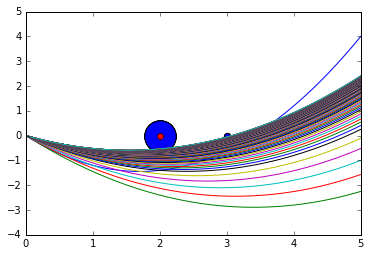

In [54]:
# PWL approximation
PWL=True
pwl_cost=[]

p_min=0
p_max=5
quad_cost=0.5
lin_cost=-1.7
pwl_points=100
pwl_cost=np.zeros([1,pwl_points])
for gen_id in range(1):
    xx=np.linspace(p_min,p_max,pwl_points+1)
    y=np.zeros(pwl_points+1)
    for i in range(0,pwl_points+1):
        y[i]=quad_cost*xx[i]**2 + lin_cost*xx[i]
        pwl_cost[gen_id][i-1]=((y[i]-y[i-1])/(xx[i]-xx[i-1]))
    plt.plot(xx,y)

pwl_points=100
pwl_cost=np.zeros([1,pwl_points])
noise=0.5
for gen_id in range(1):
    xx=np.linspace(p_min,p_max,pwl_points+1)
    y=np.zeros(pwl_points+1)
    for i in range(0,pwl_points+1):
        y[i]=(quad_cost*noise)*xx[i]**2 + lin_cost*xx[i] + -0*xx[i]
        pwl_cost[gen_id][i-1]=((y[i]-y[i-1])/(xx[i]-xx[i-1]))
    plt.plot(xx,y)

def plot_update(slope_update):
    xx=np.linspace(p_min,p_max,pwl_points+1)
    y=np.zeros(pwl_points+1)
    for i in range(0,pwl_points+1):
        y[i]=(quad_cost*noise)*xx[i]**2 + lin_cost*xx[i] + slope_update*xx[i]
        pwl_cost[gen_id][i-1]=((y[i]-y[i-1])/(xx[i]-xx[i-1]))
    plt.plot(xx,y)
            


p=Int()
# p=Variable()
Objetive= quad_form(p,quad_cost)+lin_cost*p
prob=Problem(Minimize(Objetive),[p<=p_max])
Q=prob.solve(solver=GUROBI)
plt.plot(p.value,0,'ro')
opt=p.value
slope_update=0
# slope_update.value=0
# p=Variable()
for k in range(100):
    gk=Variable(pwl_points)
    Objetive_pwl=quad_form(p,quad_cost*noise)+lin_cost*p +slope_update*p
    prob_pwl=Problem(Minimize(Objetive_pwl),[p<=p_max])
    Q_pwl=prob_pwl.solve(solver=GUROBI)
    plt.scatter(p.value,0,s=k*10+1)
#     plt.plot(p.value,0,'ko',linewidth=k/100)
    alpha=1./((k+1+10))
    slope_update=slope_update+alpha*(quad_cost*p.value*2+lin_cost - (noise*quad_cost*p.value*2+lin_cost +slope_update ) )
#     print slope_update
    plot_update(slope_update=slope_update)
#     print pwl_cost

# mult=1
# plt.plot([xx[1],xx[2]*mult],[y[1],y[2]*mult],'k') pwl_cost[0][int(p.value)]
# plt.ylim([-5,5])
plt.xlim([0,5])
plt.plot(opt,0,'ro')
plt.show()

In [333]:
print quad_cost*p.value*2+lin_cost
print (noise*quad_cost*p.value*2+lin_cost +slope_update )

0.3
0.181818181818


In [24]:
gk=Variable(pwl_points)
Objetive_pwl=0
for j in range(pwl_points):
    Objetive_pwl=Objetive_pwl + gk[j]*pwl_cost[0][j]
Constraints_pwl=[]
Constraints_pwl.append(p<=p_max)
# Constraints_pwl.append(p>=p_min)
for j in range (pwl_points):
    Constraints_pwl.append(gk[j:(j+1)]<=1.*(p_max-p_min)/(pwl_points))
    Constraints_pwl.append(gk[j:(j+1)]>=0)
Constraints_pwl.append( p== np.sum ([gk[j:(j+1)] for j in range(pwl_points)]) )
prob_pwl=Problem(Minimize(Objetive_pwl+slope_update*p),Constraints_pwl)
Q_pwl=prob_pwl.solve(solver=ECOS)

In [61]:
pwl_cost

array([[-1.825     ,  1.00833333,  3.84166667]])

In [60]:
pwl_cost[0][int(np.floor(np.cumsum(gk.value[0],0)*pwl_points/p_max))]

1.0083333333333331

In [46]:
int(np.floor(np.cumsum(gk.value[0],0)*pwl_points/p_max))

1

In [64]:
gk=Variable(pwl_points)
Objetive_pwl=0
for j in range(pwl_points):
    Objetive_pwl=Objetive_pwl + gk[j]*pwl_cost[0][j]
Constraints_pwl=[]
for j in range (pwl_points):
    Constraints_pwl.append(gk[j:(j+1)]<=(p_max-p_min)/(pwl_points))
    Constraints_pwl.append(gk[j:(j+1)]>=0)
Constraints_pwl.append( p== np.sum ([gk[j:(j+1)] for j in range(pwl_points)]) )

In [67]:
prob_pwl=Problem(Minimize(Objetive_pwl),Constraints_pwl)
Q_pwl=prob_pwl.solve(solver=GUROBI)

In [66]:
p.value

3.0